In [91]:
import numpy as np
import pandas as pd 

df = pd.read_csv("NHANES_SAMPLE.csv")  



In [92]:
len(df.columns.to_list())

701

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load datasets
df = pd.read_csv('NHANES_SAMPLE.csv')
columns = pd.read_csv('diabetes.csv')

# Select features and target
feature_columns = columns['column'].tolist()
target_column = 'DIQ010'

activity_columns = [("PAD790Q", "PAD790U"), ("PAD810Q", "PAD810U")]

# Iterate over column pairs and combine them
for freq_col, unit_col in activity_columns:
    if freq_col in df.columns and unit_col in df.columns:
        combined_col = f"{freq_col}_combined"
        
        df[combined_col] = df[freq_col].astype(str) + "_" + df[unit_col].astype(str)
        
        df.drop([freq_col, unit_col], axis=1, inplace=True)
        
        feature_columns.remove(freq_col)
        feature_columns.remove(unit_col)
        feature_columns.append(combined_col)  

df = df[feature_columns+[target_column]]

# Ensure selected features exist in df
feature_columns = [col for col in feature_columns if col in df.columns]
print(feature_columns)
# Drop rows where the target is missing
df = df.dropna(subset=[target_column])

# Convert DIQ010 to binary classification (1 = diabetes, else 0)
df[target_column] = df[target_column].apply(lambda x: 1 if x == 1 else 0)

# Convert all byte-string values to normal strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
# Print column types
print(df[feature_columns].select_dtypes(include=['object']).columns.tolist())

# # Separate categorical and numerical columns
categorical_cols = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in feature_columns if col not in categorical_cols]

# # One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # Handle missing values (fill numerical columns with median)
df.fillna(df.median(), inplace=True)

# # Split data
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,class_weight="balanced" , random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(report)
# importances = rf_model.feature_importances_
# feature_names = X_train.columns

# # Pair the feature names with their importance scores
# feature_importance_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': importances
# })

# # Sort by importance descending and select top 5
# top_5 = feature_importance_df.sort_values('importance', ascending=False).head(5)
# print("Top 5 features by importance:")
# print(top_5)


['RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'INDFMMPI', 'INDFMPIR', 'BMXBMI', 'BMXWAIST', 'BMXHIP', 'DRQSDIET', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TCHOL', 'DR1TCAFF', 'DR1_320Z', 'PAD680', 'LBXGLU', 'LBXHGB', 'LBDINSI', 'LBDHDD', 'LBXHSCRP', 'SMQ040', 'ALQ121', 'SLD012', 'SLD013', 'PAD790Q_combined', 'PAD810Q_combined']
['PAD790Q_combined', 'PAD810Q_combined']
Accuracy: 0.8579
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       671
           1       0.78      0.06      0.11       117

    accuracy                           0.86       788
   macro avg       0.82      0.53      0.52       788
weighted avg       0.85      0.86      0.80       788



In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=21), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv('NHANES_SAMPLE.csv')

# Define target column
target_column = 'DIQ010'

# Ensure target column exists
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Handle missing target values
df = df.dropna(subset=[target_column])

# Convert target column to binary classification (1 = diabetes, else 0)
df[target_column] = df[target_column].apply(lambda x: 1 if x == 1 else 0)

# Convert all byte-string values to normal strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Select all feature columns (excluding target)
feature_columns = [col for col in df.columns if col != target_column]
print(len(feature_columns))
remove_list = [ 'DID040', 'DIQ159', 'DIQ160', 'DIQ180', 'DIQ050', 'DIQ070', 'DID060', 'DIQ060U', 'DIQ065', 'DIQ070', 'DID040', 'DIQ180']
feature_columns = [col for col in df.columns if col not in remove_list]
print(len(feature_columns))
# Define activity columns to combine
activity_columns = [("PAD790Q", "PAD790U"), ("PAD810Q", "PAD810U")]

# Combine activity columns
for freq_col, unit_col in activity_columns:
    if freq_col in df.columns and unit_col in df.columns:
        combined_col = f"{freq_col}_combined"
        df[combined_col] = df[freq_col].astype(str) + "_" + df[unit_col].astype(str)
        df.drop([freq_col, unit_col], axis=1, inplace=True)
        feature_columns.remove(freq_col)
        feature_columns.remove(unit_col)
        feature_columns.append(combined_col)

# Print selected features
print("Selected Features:", feature_columns)
df =df[feature_columns]
# Separate categorical and numerical columns
categorical_cols = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in feature_columns if col not in categorical_cols]

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (fill numerical columns with median)
df.fillna(df.median(), inplace=True)

# Split data
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50,  random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(report)

from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class (1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute AUROC
auroc = roc_auc_score(y_test, y_prob)

print(f"AUROC Score: {auroc:.4f}")


700
694
Selected Features: ['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP', 'BAXMSTAT', 'BAXRXNC', 'BAXRXND', 'BAX5STAT', 'BAQ110', 'BAQ121', 'BAQ125', 'BAQ132', 'BAQ140', 'BAQ150', 'BAQ160', 'BAQ170', 'BAQ201', 'BAQ173', 'BAXPF11', 'BAXTC11', 'BAARFC11', 'BAXPF12', 'BAXTC12', 'BAARFC12', 'BAXPF21', 'BAXTC21', 'BAARFC21', 'BAXPF22', 'BAXTC22', 'BAARFC22', 'BAXPF31', 'BAXTC31', 'BAARFC31', 'BAXPF32', 'BAXTC32', 'BAARFC32', 'BAXPF41', 'BAXTC41', 'BAARFC41', 'BAXPF42', 'BAXTC42', 'BAARFC42', 'BAXPF51', '

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import re
from sklearn.impute import SimpleImputer
# Load dataset
df = pd.read_csv('NHANES_SAMPLE.csv')

# Define target column
target_column = 'DIQ010'

# Ensure target column exists
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Handle missing target values
df = df.dropna(subset=[target_column])

# Convert target column to binary classification (1 = diabetes, else 0)
df[target_column] = df[target_column].apply(lambda x: 1 if x == 1 else 0)

# Convert all byte-string values to normal strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Select all feature columns (excluding target)
feature_columns = [col for col in df.columns if col != target_column]
print(len(feature_columns))
remove_list = [ 'DID040', 'DIQ159', 'DIQ160', 'DIQ180', 'DIQ050', 'DIQ070', 'DID060', 'DIQ060U', 'DIQ065', 'DIQ070', 'DID040', 'DIQ180']
feature_columns = [col for col in df.columns if col not in remove_list]
print(len(feature_columns))
# Define activity columns to combine
activity_columns = [("PAD790Q", "PAD790U"), ("PAD810Q", "PAD810U")]

# Combine activity columns
for freq_col, unit_col in activity_columns:
    if freq_col in df.columns and unit_col in df.columns:
        combined_col = f"{freq_col}_combined"
        df[combined_col] = df[freq_col].astype(str) + "_" + df[unit_col].astype(str)
        df.drop([freq_col, unit_col], axis=1, inplace=True)
        feature_columns.remove(freq_col)
        feature_columns.remove(unit_col)
        feature_columns.append(combined_col)

# Print selected features
print("Selected Features:", feature_columns)
df =df[feature_columns]

# Separate categorical and numerical columns
categorical_cols = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in feature_columns if col not in categorical_cols]

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Handle missing values (fill numerical columns with median)
df.fillna(df.median(), inplace=True)
# Split data

df.columns = [col.replace("_", "") for col in df.columns]
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X = df.drop(columns=[target_column])

y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Clean column names: Remove special characters
# Remove special characters from column names for LightGBM

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(n_estimators=50, random_state=42),
                "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    if name ==  "Logistic Regression":
        imputer = SimpleImputer(strategy="median")

        # Fit and transform on training data
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        # Convert back to DataFrame but match column names with the original dataset
        X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns[:X_train_imputed.shape[1]])
        X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns[:X_test_imputed.shape[1]])

        # Ensure X_test has the same columns as X_train
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

        print(f"Final X_train shape: {X_train.shape}, Final X_test shape: {X_test.shape}")
    
    model.fit(X_train, y_train)
   
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(report)

    from sklearn.metrics import roc_auc_score

    # Get predicted probabilities for the positive class (1)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute AUROC
    auroc = roc_auc_score(y_test, y_prob)

    
    results[name] = {"Accuracy": accuracy, "AUROC": auroc}
    
    # Print evaluation report
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} AUROC Score: {auroc:.4f}")

# Print comparison table
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


700
694
Selected Features: ['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP', 'BAXMSTAT', 'BAXRXNC', 'BAXRXND', 'BAX5STAT', 'BAQ110', 'BAQ121', 'BAQ125', 'BAQ132', 'BAQ140', 'BAQ150', 'BAQ160', 'BAQ170', 'BAQ201', 'BAQ173', 'BAXPF11', 'BAXTC11', 'BAARFC11', 'BAXPF12', 'BAXTC12', 'BAARFC12', 'BAXPF21', 'BAXTC21', 'BAARFC21', 'BAXPF22', 'BAXTC22', 'BAARFC22', 'BAXPF31', 'BAXTC31', 'BAARFC31', 'BAXPF32', 'BAXTC32', 'BAARFC32', 'BAXPF41', 'BAXTC41', 'BAARFC41', 'BAXPF42', 'BAXTC42', 'BAARFC42', 'BAXPF51', '

/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9340
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       671
           1       0.85      0.68      0.75       117

    accuracy                           0.93       788
   macro avg       0.90      0.83      0.86       788
weighted avg       0.93      0.93      0.93       788

XGBoost Accuracy: 0.9340
XGBoost AUROC Score: 0.9465

Training LightGBM...
[LightGBM] [Info] Number of positive: 443, number of negative: 2707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41546
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 586
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140635 -> initscore=-1.810027
[LightGBM] [Info] Start training from score -1.810027
Accuracy: 0.9378
        

/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['RIDAGEMN' 'RIDEXAGM' 'DMDHRGND' 'DMDHRAGZ' 'DMDHREDZ' 'DMDHRMAZ'
 'DMDHSEDZ' 'BMXRECUM' 'BMIRECUM' 'BMXHEAD' 'BMIHEAD' 'BMDBMIC' 'FNQ021'
 'FNQ041' 'FNQ050' 'FNQ060' 'FNQ080' 'FNQ160' 'FNQ100' 'FNQ110' 'FNQ120'
 'FNQ170' 'FNQ180' 'FNQ190' 'FNQ130' 'FNQ200' 'FNQ140' 'FNQ150' 'FNDCDI'
 'DBQ010' 'DBD030' 'DBD041' 'DBD050' 'DBD055' 'DBD061' 'DBQ073A' 'DBQ073B'
 'DBQ073C' 'DBQ073D' 'DBQ073E' 'DBQ073U' 'DBQ360' 'DBQ370' 'DBD381'
 'DBQ390' 'DBQ400' 'DBD411' 'DBQ421' 'DBQ424' 'PAQ706' 'PAQ711' 'SMQ621'
 'SMD630' 'ECD070A' 'ECD070B' 'ECQ080' 'ECQ090' 'WHQ030E' 'MCQ080E'
 'MCQ149' 'MCQ500']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observe

Accuracy: 0.8452
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       671
           1       0.41      0.10      0.16       117

    accuracy                           0.85       788
   macro avg       0.64      0.54      0.54       788
weighted avg       0.80      0.85      0.80       788

Logistic Regression Accuracy: 0.8452
Logistic Regression AUROC Score: 0.7660

Model Comparison:
                      Accuracy     AUROC
Random Forest        0.912437  0.935846
XGBoost              0.934010  0.946476
LightGBM             0.937817  0.950399
Logistic Regression  0.845178  0.766008


/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import re
from sklearn.impute import SimpleImputer
# Load dataset
df = pd.read_csv('NHANES_SAMPLE.csv')

# Define target column
target_column = 'KIQ022'

# Ensure target column exists
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Handle missing target values
df = df.dropna(subset=[target_column])

# Convert target column to binary classification (1 = diabetes, else 0)
df[target_column] = df[target_column].apply(lambda x: 1 if x == 1 else 0)

# Convert all byte-string values to normal strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Select all feature columns (excluding target)
feature_columns = [col for col in df.columns if col != target_column]
print(len(feature_columns))
remove_list = ['KIQ025','KIQ005', 'KIQ010', 'KIQ042', 'KIQ044', 'KIQ048A', 'KIQ052', 'KIQ481']
feature_columns = [col for col in df.columns if col not in remove_list]
print(len(feature_columns))
# Define activity columns to combine
activity_columns = [("PAD790Q", "PAD790U"), ("PAD810Q", "PAD810U")]

# Combine activity columns
for freq_col, unit_col in activity_columns:
    if freq_col in df.columns and unit_col in df.columns:
        combined_col = f"{freq_col}_combined"
        df[combined_col] = df[freq_col].astype(str) + "_" + df[unit_col].astype(str)
        df.drop([freq_col, unit_col], axis=1, inplace=True)
        feature_columns.remove(freq_col)
        feature_columns.remove(unit_col)
        feature_columns.append(combined_col)

# Print selected features
print("Selected Features:", feature_columns)
df =df[feature_columns]

# Separate categorical and numerical columns
categorical_cols = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in feature_columns if col not in categorical_cols]

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Handle missing values (fill numerical columns with median)
df.fillna(df.median(), inplace=True)
# Split data

df.columns = [col.replace("_", "") for col in df.columns]
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X = df.drop(columns=[target_column])

y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Clean column names: Remove special characters
# Remove special characters from column names for LightGBM

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(n_estimators=50, random_state=42),
                "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    if name ==  "Logistic Regression":
        imputer = SimpleImputer(strategy="median")

        # Fit and transform on training data
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        # Convert back to DataFrame but match column names with the original dataset
        X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns[:X_train_imputed.shape[1]])
        X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns[:X_test_imputed.shape[1]])

        # Ensure X_test has the same columns as X_train
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

        print(f"Final X_train shape: {X_train.shape}, Final X_test shape: {X_test.shape}")
    
    model.fit(X_train, y_train)
   
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(report)

    from sklearn.metrics import roc_auc_score

    # Get predicted probabilities for the positive class (1)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute AUROC
    auroc = roc_auc_score(y_test, y_prob)

    
    results[name] = {"Accuracy": accuracy, "AUROC": auroc}
    
    # Print evaluation report
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} AUROC Score: {auroc:.4f}")

# Print comparison table
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


700
694
Selected Features: ['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP', 'BAXMSTAT', 'BAXRXNC', 'BAXRXND', 'BAX5STAT', 'BAQ110', 'BAQ121', 'BAQ125', 'BAQ132', 'BAQ140', 'BAQ150', 'BAQ160', 'BAQ170', 'BAQ201', 'BAQ173', 'BAXPF11', 'BAXTC11', 'BAARFC11', 'BAXPF12', 'BAXTC12', 'BAARFC12', 'BAXPF21', 'BAXTC21', 'BAARFC21', 'BAXPF22', 'BAXTC22', 'BAARFC22', 'BAXPF31', 'BAXTC31', 'BAARFC31', 'BAXPF32', 'BAXTC32', 'BAARFC32', 'BAXPF41', 'BAXTC41', 'BAARFC41', 'BAXPF42', 'BAXTC42', 'BAARFC42', 'BAXPF51', '

/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.9645
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       760
           1       0.00      0.00      0.00        28

    accuracy                           0.96       788
   macro avg       0.48      0.50      0.49       788
weighted avg       0.93      0.96      0.95       788

Random Forest Accuracy: 0.9645
Random Forest AUROC Score: 0.8039

Training XGBoost...


/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9657
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       760
           1       1.00      0.04      0.07        28

    accuracy                           0.97       788
   macro avg       0.98      0.52      0.53       788
weighted avg       0.97      0.97      0.95       788

XGBoost Accuracy: 0.9657
XGBoost AUROC Score: 0.8316

Training LightGBM...
[LightGBM] [Info] Number of positive: 124, number of negative: 3026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41601
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 586
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039365 -> initscore=-3.194715
[LightGBM] [Info] Start training from score -3.194715
Accuracy: 0.9645
        

/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['RIDAGEMN' 'RIDEXAGM' 'DMDHRGND' 'DMDHRAGZ' 'DMDHREDZ' 'DMDHRMAZ'
 'DMDHSEDZ' 'BMXRECUM' 'BMIRECUM' 'BMXHEAD' 'BMIHEAD' 'BMDBMIC' 'FNQ021'
 'FNQ041' 'FNQ050' 'FNQ060' 'FNQ080' 'FNQ160' 'FNQ100' 'FNQ110' 'FNQ120'
 'FNQ170' 'FNQ180' 'FNQ190' 'FNQ130' 'FNQ200' 'FNQ140' 'FNQ150' 'FNDCDI'
 'DBQ010' 'DBD030' 'DBD041' 'DBD050' 'DBD055' 'DBD061' 'DBQ073A' 'DBQ073B'
 'DBQ073C' 'DBQ073D' 'DBQ073E' 'DBQ073U' 'DBQ360' 'DBQ370' 'DBD381'
 'DBQ390' 'DBQ400' 'DBD411' 'DBQ421' 'DBQ424' 'PAQ706' 'PAQ711' 'SMQ621'
 'SMD630' 'ECD070A' 'ECD070B' 'ECQ080' 'ECQ090' 'WHQ030E' 'MCQ080E'
 'MCQ149' 'MCQ500']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observe

Accuracy: 0.9645
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       760
           1       0.00      0.00      0.00        28

    accuracy                           0.96       788
   macro avg       0.48      0.50      0.49       788
weighted avg       0.93      0.96      0.95       788

Logistic Regression Accuracy: 0.9645
Logistic Regression AUROC Score: 0.6428

Model Comparison:
                      Accuracy     AUROC
Random Forest        0.964467  0.803900
XGBoost              0.965736  0.831626
LightGBM             0.964467  0.836748
Logistic Regression  0.964467  0.642763


/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import re
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('NHANES_SAMPLE.csv')

# Define target variable based on multiple columns
target_columns = ['MCQ160C', 'MCQ160B', 'MCQ160D', 'MCQ160E', 'MCQ160F']

# Create a binary target column
df["target"] = df[target_columns].apply(lambda row: 1 if (row == 1).any() else 0, axis=1)

# Drop original columns since they are now merged
df.drop(columns=target_columns, inplace=True)

# Ensure no missing target values
df = df.dropna(subset=["target"])

# Convert all byte-string values to normal strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Select all feature columns (excluding target)
feature_columns = [col for col in df.columns if col != "target"]

# Define activity columns to combine
activity_columns = [("PAD790Q", "PAD790U"), ("PAD810Q", "PAD810U")]

# Combine activity columns
for freq_col, unit_col in activity_columns:
    if freq_col in df.columns and unit_col in df.columns:
        combined_col = f"{freq_col}_combined"
        df[combined_col] = df[freq_col].astype(str) + "_" + df[unit_col].astype(str)
        df.drop([freq_col, unit_col], axis=1, inplace=True)
        feature_columns.remove(freq_col)
        feature_columns.remove(unit_col)
        feature_columns.append(combined_col)

# Print selected features
print("Selected Features:", feature_columns)
df = df[feature_columns + ["target"]]

# Separate categorical and numerical columns
categorical_cols = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in feature_columns if col not in categorical_cols]

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (fill numerical columns with median)
df.fillna(df.median(), inplace=True)

# Clean column names: Remove special characters for LightGBM
df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]

# Split data
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=50, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Handle missing values for Logistic Regression
    if name == "Logistic Regression":
        imputer = SimpleImputer(strategy="median")

        # Fit and transform on training data
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        # Convert back to DataFrame but match column names with the original dataset
        X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns[:X_train_imputed.shape[1]])
        X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns[:X_test_imputed.shape[1]])

        # Ensure X_test has the same columns as X_train
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

        print(f"Final X_train shape: {X_train.shape}, Final X_test shape: {X_test.shape}")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    results[name] = {"Accuracy": accuracy, "AUROC": auroc}

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} AUROC Score: {auroc:.4f}")
    report = classification_report(y_test, y_pred)
    print(report)

# Print comparison table
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

Selected Features: ['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP', 'BAXMSTAT', 'BAXRXNC', 'BAXRXND', 'BAX5STAT', 'BAQ110', 'BAQ121', 'BAQ125', 'BAQ132', 'BAQ140', 'BAQ150', 'BAQ160', 'BAQ170', 'BAQ201', 'BAQ173', 'BAXPF11', 'BAXTC11', 'BAARFC11', 'BAXPF12', 'BAXTC12', 'BAARFC12', 'BAXPF21', 'BAXTC21', 'BAARFC21', 'BAXPF22', 'BAXTC22', 'BAARFC22', 'BAXPF31', 'BAXTC31', 'BAARFC31', 'BAXPF32', 'BAXTC32', 'BAARFC32', 'BAXPF41', 'BAXTC41', 'BAARFC41', 'BAXPF42', 'BAXTC42', 'BAARFC42', 'BAXPF51', 'BAXTC51'

/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:39:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8959
XGBoost AUROC Score: 0.8800
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       686
           1       0.66      0.41      0.51       102

    accuracy                           0.90       788
   macro avg       0.79      0.69      0.72       788
weighted avg       0.88      0.90      0.89       788


Training LightGBM...
[LightGBM] [Info] Number of positive: 414, number of negative: 2736
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41618
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 588
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.131429 -> initscore=-1.888386
[LightGBM] [Info] Start training from score -1.888386
LightGBM Accuracy: 0.8972
LightGBM AUROC Score: 0.8883
              precision    recall  f1-score   suppo

/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['RIDAGEMN' 'RIDEXAGM' 'DMDHRGND' 'DMDHRAGZ' 'DMDHREDZ' 'DMDHRMAZ'
 'DMDHSEDZ' 'BMXRECUM' 'BMIRECUM' 'BMXHEAD' 'BMIHEAD' 'BMDBMIC' 'FNQ021'
 'FNQ041' 'FNQ050' 'FNQ060' 'FNQ080' 'FNQ160' 'FNQ100' 'FNQ110' 'FNQ120'
 'FNQ170' 'FNQ180' 'FNQ190' 'FNQ130' 'FNQ200' 'FNQ140' 'FNQ150' 'FNDCDI'
 'DBQ010' 'DBD030' 'DBD041' 'DBD050' 'DBD055' 'DBD061' 'DBQ073A' 'DBQ073B'
 'DBQ073C' 'DBQ073D' 'DBQ073E' 'DBQ073U' 'DBQ360' 'DBQ370' 'DBD381'
 'DBQ390' 'DBQ400' 'DBD411' 'DBQ421' 'DBQ424' 'PAQ706' 'PAQ711' 'SMQ621'
 'SMD630' 'ECD070A' 'ECD070B' 'ECQ080' 'ECQ090' 'WHQ030E' 'MCQ080E'
 'MCQ149' 'MCQ500']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observe

Logistic Regression Accuracy: 0.8668
Logistic Regression AUROC Score: 0.7679
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       686
           1       0.40      0.06      0.10       102

    accuracy                           0.87       788
   macro avg       0.64      0.52      0.52       788
weighted avg       0.81      0.87      0.82       788


Model Comparison:
                      Accuracy     AUROC
Random Forest        0.879442  0.882875
XGBoost              0.895939  0.880023
LightGBM             0.897208  0.888312
Logistic Regression  0.866751  0.767879


/home/maiya.goloburda/miniconda3/envs/ml808/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


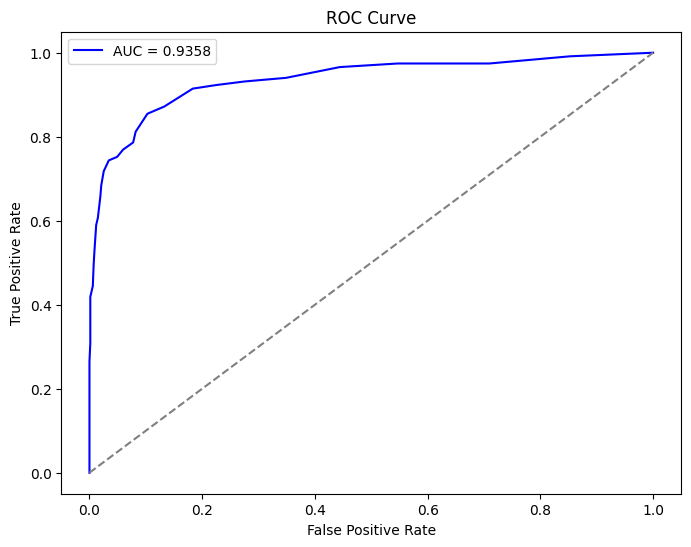

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [44]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Pair the feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance descending and select top 5
top_5 = feature_importance_df.sort_values('importance', ascending=False).head(5)
print("Top 5 features by importance:")
print(top_5)


Top 5 features by importance:
      feature  importance
181     LBXGH    0.106789
253  LBDGLUSI    0.037485
252    LBXGLU    0.033483
515    RXQ050    0.026255
206     LBXTC    0.012261
